In [1]:
from sklearn.datasets import load_digits

In [4]:
X, y = load_digits(return_X_y=True)
X.shape, y.shape

((1797, 64), (1797,))

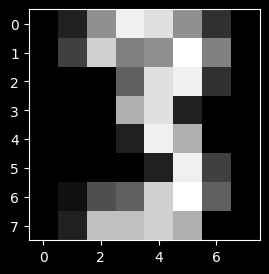

In [26]:
import matplotlib.pyplot as plt
plt.style.use("dark_background")

plt.figure(figsize=(3,3))
plt.imshow(X[13].reshape((8,8)), cmap="gray");

We don't need the `X`. Instead, by using `y` and `np.random`, we'd like to create
a bunch of independent weak learners, which together form a strong learner.

#### Ref.
- <https://numpy.org/doc/stable/reference/generated/numpy.select.html>

In [27]:
y

array([0, 1, 2, ..., 8, 9, 8])

In [32]:
import numpy as np
np.random.shuffle?

Docstring:
shuffle(x)

Modify a sequence in-place by shuffling its contents.

This function only shuffles the array along the first axis of a
multi-dimensional array. The order of sub-arrays is changed but
their contents remains the same.

.. note::
    New code should use the ``shuffle`` method of a ``default_rng()``
    instance instead; please see the :ref:`random-quick-start`.

Parameters
----------
x : ndarray or MutableSequence
    The array, list or mutable sequence to be shuffled.

Returns
-------
None

See Also
--------
random.Generator.shuffle: which should be used for new code.

Examples
--------
>>> arr = np.arange(10)
>>> np.random.shuffle(arr)
>>> arr
[1 7 5 2 9 4 3 6 0 8] # random

Multi-dimensional arrays are only shuffled along the first axis:

>>> arr = np.arange(9).reshape((3, 3))
>>> np.random.shuffle(arr)
>>> arr
array([[3, 4, 5], # random
       [6, 7, 8],
       [0, 1, 2]])
Type:      builtin_function_or_method


In [47]:
class Weak:
    def __init__(self, p=0.52):
        self.p = p

    def predict(self):
        #incorrect = np.random.randint(low=0, high=10, size=len(y))
        incorrect = (y - 1) % 10
        correct = y
        n_True = int(self.p * len(y))
        n_False = len(y) - n_True
        conditions = [True] * n_True + [False] * n_False
        np.random.shuffle(conditions)
        y_pred = np.where(conditions, correct, incorrect)
        return y_pred

In [48]:
weak = Weak()


In [49]:
y_pred = weak.predict()

- <https://scikit-learn.org/stable/modules/model_evaluation.html>

In [50]:
from sklearn.metrics import accuracy_score

In [52]:
np.array_equal(Weak().predict(), Weak().predict())

False

In [51]:
accuracy_score(y, y_pred)

0.5197551474680022

In [53]:
print(f"{Weak().predict()[:10]}")
print(f"{Weak().predict()[:10]}")

[0 1 1 2 3 4 5 6 7 9]
[0 0 2 3 4 5 5 7 8 9]


In [76]:
k = 5_000
weaks = [Weak() for _ in range(k)]
pred_list = [weak.predict() for weak in weaks]

### Reminder on `Counter`

In [87]:
digits = np.random.randint(low=0, high=10, size=100)
c = Counter(digits)
print(f"{c.most_common(3) = }")
print(f"{c.most_common(1) = }")

c.most_common(3) = [(1, 17), (9, 13), (4, 11)]
c.most_common(1) = [(1, 17)]


In [83]:
from collections import Counter
from tqdm.auto import tqdm

def hard_vote(pred_list):
    final_pred = []
    m = len(pred_list[0])
    for i in tqdm(range(m)):
        ith_preds = [pred[i] for pred in pred_list]
        counter = Counter(ith_preds)
        final_pred.append(counter.most_common(1)[0][0])
    return final_pred

In [84]:
y_vote = hard_vote(pred_list)
accuracy_score(y, y_vote)

  0%|          | 0/1797 [00:00<?, ?it/s]

0.9972175848636616